In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
nx = 256
ny = 256
x_max = 2 * np.pi 
y_max = 2 * np.pi
dx = x_max / nx
dy = y_max / ny
dt = 0.0
CFL = 0.7
x = np.arange(0.0, x_max, dx)
y = np.arange(0.0, y_max, dy)
X, Y = np.meshgrid(x, y)

gamma = 5.0/3.0

FileNotFoundError: [Errno 2] No such file or directory: 'results_256/orszag_tang_100.bin'

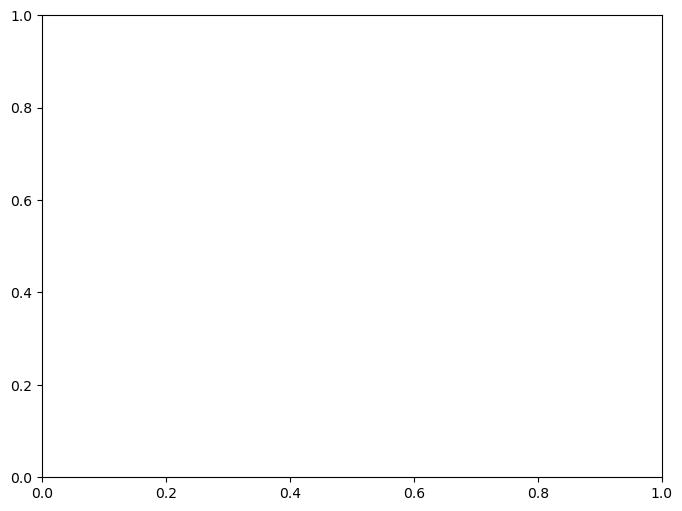

In [7]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

log = np.loadtxt("log_256.txt", delimiter=',')
dirname = "results_256"
step = 100
filename = f"{dirname}/orszag_tang_{step}.bin"
with open(filename, 'rb') as f:
    U = np.fromfile(f, dtype=np.float64)
U = U.reshape(nx, ny, 8).T

rho = U[0, :, :]
u = U[1, :, :] / rho
v = U[2, :, :] / rho
w = U[3, :, :] / rho
Bx = U[4, :, :]
By = U[5, :, :]
Bz = U[6, :, :]
e = U[7, :, :]
p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
pT = p + magnetic_pressure

contour = ax1.pcolormesh(X, Y, (p/rho), vmin=0.3, vmax=1.3, cmap='jet')
cbar = plt.colorbar(contour, ax=ax1)

ax1.set_title(r"$p/\rho$", fontsize=24)
ax1.text(0.8, 1.02, f"t = {log[int(step/10)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
ax1.tick_params(labelsize=16)
plt.show()

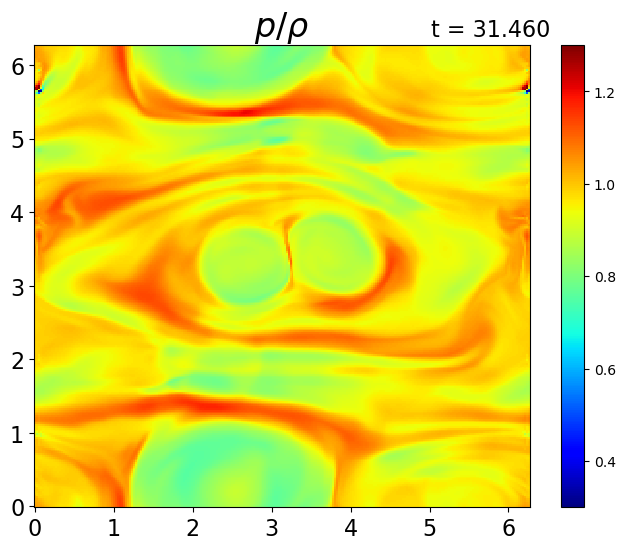

In [4]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

log = np.loadtxt("log_256.txt", delimiter=',')
dirname = "results_256"
total_steps = int(log[-1][0])
interval = 100
for step in range(0, total_steps+interval, interval):
    ax1.clear()

    filename = f"{dirname}/orszag_tang_{step}.bin"
    with open(filename, 'rb') as f:
        U = np.fromfile(f, dtype=np.float64)
    U = U.reshape(nx, ny, 8).T
    rho = U[0, :, :]
    u = U[1, :, :] / rho 
    v = U[2, :, :] / rho 
    w = U[3, :, :] / rho 
    Bx = U[4, :, :]
    By = U[5, :, :]
    Bz = U[6, :, :]
    e = U[7, :, :]
    p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
    magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
    pT = p + magnetic_pressure

    contour = ax1.pcolormesh(X, Y, (p/rho), vmin=0.3, vmax=1.3, cmap='jet')
    if step == 0:
        cbar = plt.colorbar(contour, ax=ax1)

    ax1.set_title(r"$p/\rho$", fontsize=24)
    ax1.text(0.8, 1.02, f"t = {log[int(step/interval)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
    ax1.tick_params(labelsize=16)

    fig.savefig(f"pictures/{step}.png", dpi=200)


filename = "orszag-tang_p-rho.mp4"
img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps+interval, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()